In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
def k_medoids(data, k, max_iters=100, tol=1e-4):
    n, m = data.shape
    
    # Randomly initialize medoids
    medoids = data[np.random.choice(n, k, replace=False)]
    
    for _ in range(max_iters):
        # Assign each data point to the nearest medoid
        distances = np.linalg.norm(data[:, np.newaxis, :] - medoids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Update medoids
        new_medoids = np.array([data[labels == i][np.argmin(np.sum(distances[labels == i, :], axis=1))] for i in range(k)])
        
        # Check for convergence
        if np.linalg.norm(new_medoids - medoids) < tol:
            break
        
        medoids = new_medoids
    
    return labels, medoids



In [8]:
# Generate synthetic data for testing
np.random.seed(42)
data = np.concatenate([np.random.normal(loc=(0, 0), scale=1, size=(1000, 2)),
                       np.random.normal(loc=(5, 5), scale=1, size=(1000, 2)),
                       np.random.normal(loc=(10, 0), scale=1, size=(1000, 2))])

In [9]:

# Apply k-medoids algorithm
k = 3
labels, medoids = k_medoids(data, k)

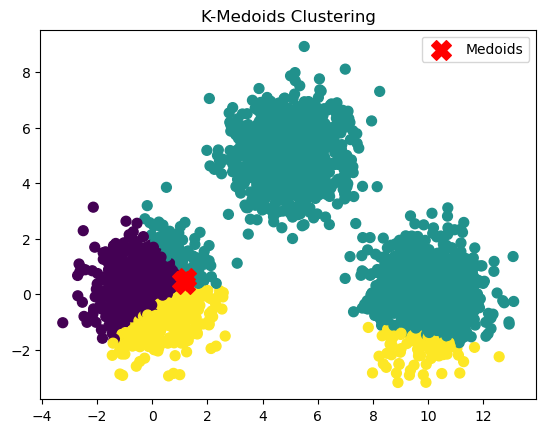

In [10]:


# Plot the results
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='X', s=200, label='Medoids')
plt.title('K-Medoids Clustering')
plt.legend()
plt.show()